<a href="https://colab.research.google.com/github/melltl/data_science/blob/main/projeto_avaliativo_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avalição

## Importação dos dados e Bibliotecas
## Altere o nome dos dataframes caso sinta necessidade

In [ ]:
!pip install pandasql

In [ ]:
pip install sqlalchemy==1.4.46

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
from pandasql import sqldf
pd.set_option('display.max_columns', None)

df_1 = pd.read_csv('/content/psd_coffee.csv')

df_2 = pd.read_csv('/content/death-rate-smoking new.csv')

df_3 = pd.read_csv('/content/rushing_cleaned.csv')

## 1° Parte da Avalição

In [ ]:
df_1 = df_1[df_1['Country'].isin(['Venezuela', 'Vietnam', 'Yemen', 'Yemen (Sanaa)', 'Zambia', 'Zimbabwe', 'Albania', 'United Kingdom', 'United States', 'Uruguay'])]

In [ ]:
df_1.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Remova aqui as colunas `Rst,Ground Dom. Consum` e `Soluble Dom. Cons.`

In [ ]:
# TRATAMENTO
df_1.drop(columns = ['Rst,Ground Dom. Consum', 'Soluble Dom. Cons.'])

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,Zimbabwe,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6012,Zimbabwe,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6013,Zimbabwe,2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6014,Zimbabwe,2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 1°) Calcule o consumo doméstico total (`Domestic Consumption`) para a Albania (`Country`). Considere todos os anos

In [ ]:
df_1[df_1['Country'] == 'Albania']['Domestic Consumption'].count()

64

#### 2°) Calcule a variância da métrica `Bean Imports` para todos os países, excluindo o país Albania (`Country`)

In [ ]:
albania = df_1['Country'] == 'Albania'
df_sem_albania = df_1[~albania]
df_sem_albania.groupby(by = ['Country'])['Bean Imports'].var()

Country
United Kingdom    7.926805e+05
United States     1.231576e+08
Uruguay           1.150546e+02
Venezuela         4.692100e+04
Vietnam           2.944852e+04
Yemen             0.000000e+00
Yemen (Sanaa)     0.000000e+00
Zambia            0.000000e+00
Zimbabwe          0.000000e+00
Name: Bean Imports, dtype: float64

#### 3°) Dentre os paises da coluna `Country`, qual deles apresentou a maior exportação de grãos (`Bean Exports`) no ano de 1992?

In [ ]:
grao1992 = df_1[(df_1['Year'] == 1992)]
grao1992[['Country', 'Bean Exports']].max()


Country         Zimbabwe
Bean Exports        2175
dtype: object

#### 4°) Analise os dados referentes ao consumo interno de café no Zimbabwe entre **1990 e 2001**
##### - Realize o plot do gráfico **temporal** que mostra a evolução do índice `Domestic Consumption` durante esse período citado, no Zimbabwe
#### - **Utilizando o Pandas** Identifique o ano em que o consumo interno de café (`Domestic Consumption`) no Zimbabwe atingiu o valor máximo durante esse período
##### - Descreva o que você observa no gráfico com relação à tendência do consumo de café no Zimbabwe entre 1990 e 2001.

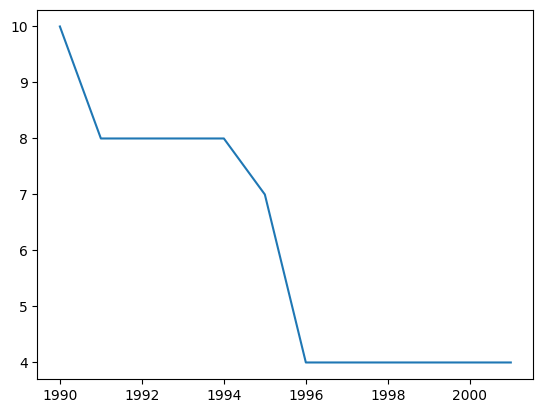

In [ ]:
entre_anos = df_1[(df_1['Year'] >= 1990) & (df_1['Year'] <= 2001)]
zimb_entre = entre_anos[entre_anos['Country'] == 'Zimbabwe']
plt.plot(zimb_entre.Year, zimb_entre['Domestic Consumption'])

#### 5°) Plot um gráfico temporal para analisar a tendência do índice `Domestic Consumption` durante o período de **2000 até 2008**, em seguida faça um `print()` mostrando o ano com o maior e aquele com o menor consumo

Domestic Consumption    22086
Year                     2008
dtype: int64

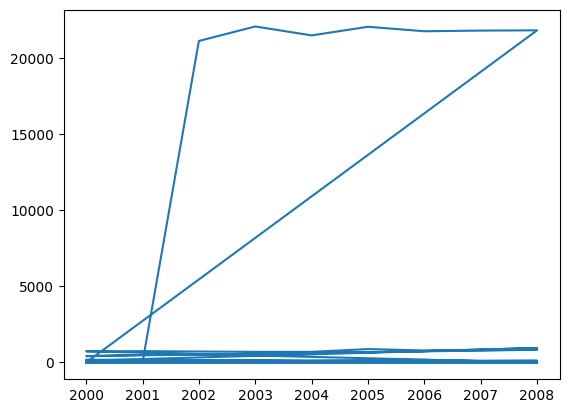

In [ ]:
entre_anos = df_1[(df_1['Year'] >= 2000) & (df_1['Year'] <= 2008)]
plt.plot(entre_anos.Year, entre_anos['Domestic Consumption'])
entre_anos[['Domestic Consumption','Year' ]].max()

In [ ]:
entre_anos[['Domestic Consumption','Year']].min()

Domestic Consumption       0
Year                    2000
dtype: int64

## ---------------------------------------------------------------------

## 2° Parte da Avalição

In [ ]:
df_2 = df_2[df_2['Entity'].isin(['Zimbabwe', 'Puerto Rico', 'United Kingdom', 'United States', 'Afghanistan', 'African Region (WHO)', 'Albania'])]

In [ ]:
df_2.head()

,Entity,Code,Year,Smoking mortality
0,Afghanistan,AFG,1990,7.583.769
1,African Region (WHO),WHO,1990,8.285.964
2,Albania,ALB,1990,14.721.635
163,Puerto Rico,PRI,1990,68.547.676
214,United Kingdom,GBR,1990,19.534.468


##### Remova aqui a coluna `Code`

In [ ]:
# TRATAMENTO
df_2.isnull().sum()

Entity                 0
Code                 689
Year                   0
Smoking mortality      0
dtype: int64

In [ ]:
df_2.drop(['Code'],axis=1,inplace=True)

In [ ]:
df_2['Smoking mortality'] = df_2['Smoking mortality'].str.replace('.', '', regex=True)
df_2['Smoking mortality']=df_2['Smoking mortality'].astype(float)

#### 6°) Monte um Dataframe que contenha o total de mortalidade associada ao fumo para cada ano (`Year`). Considere apenas o perído entre 1992 e 1998

In [ ]:
df_2.loc[df_2['Year']==1992]

,Entity,Year,Smoking mortality
456,Afghanistan,1992,7566105.0
457,African Region (WHO),1992,8275444.0
458,Albania,1992,13761829.0
459,Algeria,1992,13787665.0
460,American Samoa,1992,15245964.0
...,...,...,...
679,Western Pacific Region (WHO),1992,18504356.0
680,World,1992,15447014.0
681,Yemen,1992,17284686.0
682,Zambia,1992,11755629.0


In [ ]:
#df_2.pivot_table(values='Smoking mortality',index=['Smoking mortality','Year'],aggfunc='sum',margins=True)

anos_mortalidade = df_2[(df_2['Year'] > 1991) & (df_2['Year'] < 1999) ]
anos_mortalidade.head(10)

,Entity,Year,Smoking mortality
456,Afghanistan,1992,7566105.0
457,African Region (WHO),1992,8275444.0
458,Albania,1992,13761829.0
459,Algeria,1992,13787665.0
460,American Samoa,1992,15245964.0
461,Andorra,1992,11449643.0
462,Angola,1992,1138551.0
463,Antigua and Barbuda,1992,46644783.0
464,Argentina,1992,13811658.0
465,Armenia,1992,17889383.0


In [ ]:

df_questao6=anos_mortalidade.groupby('Year')['Smoking mortality'].sum()
df_questao6=pd.DataFrame(data=df_questao6)
df_questao6

,Smoking mortality
Year,
1992,4.931112e+09
1993,4.332741e+09
1994,5.039812e+09
1995,5.371488e+09
1996,5.491754e+09
1997,5.047839e+09
1998,5.375556e+09


#### 7°) Monte uma tabela que apresente a **Mediana** da mortalidade associada ao fumo para cada entidade (`Entity`). Considere apenas o período entre 1990 e 1994

In [ ]:
df_2.sort_values(by=['Year'])

,Entity,Year,Smoking mortality
0,Afghanistan,1990,7583769.0
145,North America (WB),1990,15944508.0
146,North Korea,1990,1379479.0
147,North Macedonia,1990,2003586.0
148,Northern Ireland,1990,2006211.0
...,...,...,...
6691,Grenada,2019,48996212.0
6692,Guam,2019,83486084.0
6693,Guatemala,2019,36620483.0
6695,Guinea-Bissau,2019,40387897.0


In [ ]:
medias_mortalidade = df_2[(df_2['Year'] >=1990) & (df_2['Year'] < 1995) ]
medias_mortalidade

,Entity,Year,Smoking mortality
0,Afghanistan,1990,7583769.0
1,African Region (WHO),1990,8285964.0
2,Albania,1990,14721635.0
3,Algeria,1990,14394376.0
4,American Samoa,1990,15573251.0
...,...,...,...
1135,Western Pacific Region (WHO),1994,18267453.0
1136,World,1994,1541681.0
1137,Yemen,1994,17002672.0
1138,Zambia,1994,12189271.0


In [ ]:
df_7=medias_mortalidade.groupby(['Year'])['Smoking mortality'].mean()
df_7

Year
1990    2.243662e+07
1991    2.123395e+07
1992    2.162768e+07
1993    1.900325e+07
1994    2.210444e+07
Name: Smoking mortality, dtype: float64

#### 8°) Apresente um DataFrame com as entidades (`Entity`) que possuem mortalidade associada ao fumo(`Smoking mortality`) maior que 11.602.391 no ano de 1990

In [ ]:
entity_mortalidade = df_2[(df_2['Year'] ==1990) & (df_2['Smoking mortality']> 11602391)]
entity_mortalidade

,Entity,Year,Smoking mortality
2,Albania,1990,14721635.0
3,Algeria,1990,14394376.0
4,American Samoa,1990,15573251.0
7,Antigua and Barbuda,1990,45728844.0
8,Argentina,1990,14376405.0
...,...,...,...
217,Uruguay,1990,13598853.0
219,Vanuatu,1990,19173486.0
221,Vietnam,1990,13032092.0
222,Wales,1990,19986354.0


#### 9°) Encontre a entidade (`Entity`) com a **menor** e aquela com a **maior** mortalidade associada ao fumo (**Smoking mortality**). Considere todos os anos (`Year`). Mostre um dataframe contendo apenas esses dois registros



In [ ]:
df_2['Smoking mortality'].idxmax()

3476

In [ ]:
df_2['Smoking mortality'].idxmin()

1646

#### 10°) Monte uma tabela que contenha a mortalidade média **POR** entidade (`Entity`) e ano (`Year`). Ordenando (de forma decrescente) os registros dessa tabela de acordo com o valor do índice de mortalidade associada ao fumo. Leve em conta apenas o período entre 1990 e 1994.

In [ ]:
entity_mortalidade_media = df_2[(df_2['Year'] >=1990) & (df_2['Year']< 1995)]
entity_mortalidade_media

,Entity,Year,Smoking mortality
0,Afghanistan,1990,7583769.0
1,African Region (WHO),1990,8285964.0
2,Albania,1990,14721635.0
3,Algeria,1990,14394376.0
4,American Samoa,1990,15573251.0
...,...,...,...
1135,Western Pacific Region (WHO),1994,18267453.0
1136,World,1994,1541681.0
1137,Yemen,1994,17002672.0
1138,Zambia,1994,12189271.0


In [ ]:
df_10=entity_mortalidade_media.groupby(['Year','Entity'])['Smoking mortality'].mean()
df_10

Year  Entity                      
1990  Afghanistan                      7583769.0
      African Region (WHO)             8285964.0
      Albania                         14721635.0
      Algeria                         14394376.0
      American Samoa                  15573251.0
                                         ...    
1994  Western Pacific Region (WHO)    18267453.0
      World                            1541681.0
      Yemen                           17002672.0
      Zambia                          12189271.0
      Zimbabwe                        14474861.0
Name: Smoking mortality, Length: 1140, dtype: float64

## ---------------------------------------------------------------------

## 3° Parte da Avalição

In [ ]:
df_3.head()

,Unnamed: 0,Player,Age,G,GS,rAtt,rYds,rTD,r1D,rLng,rY/A,rY/g,Fmb,Year
0,0,Stephen Davis,27,16,16,356,1432,5,75,32,4.0,89.5,6,2001
1,1,Corey Dillon,27,16,16,340,1315,10,69,96,3.9,82.2,5,2001
2,2,LaDainian Tomlinson,22,16,16,339,1236,10,68,54,3.6,77.3,8,2001
3,3,Curtis Martin,28,16,16,333,1513,10,78,47,4.5,94.6,2,2001
4,4,Priest Holmes,28,16,16,327,1555,8,81,41,4.8,97.2,4,2001


#### Remova aqui as colunas `rYds`, `rLng`, `Unnamed: 0`, `rY/A` e `rY/g`

In [ ]:
# TRATAMENTO
df_3.drop(columns= ['rYds', 'rLng', 'rY/A', 'rY/g', 'Unnamed: 0'])

,Player,Age,G,GS,rAtt,rTD,r1D,Fmb,Year
0,Stephen Davis,27,16,16,356,5,75,6,2001
1,Corey Dillon,27,16,16,340,10,69,5,2001
2,LaDainian Tomlinson,22,16,16,339,10,68,8,2001
3,Curtis Martin,28,16,16,333,10,78,2,2001
4,Priest Holmes,28,16,16,327,8,81,4,2001
...,...,...,...,...,...,...,...,...,...
7511,Jonathan Williams,29,1,0,1,0,0,0,2023
7512,Mike Williams,29,3,3,1,0,0,0,2023
7513,Robert Woods,31,14,11,1,0,0,0,2023
7514,Logan Woodside,28,1,0,1,0,0,0,2023


#### 11°) Monte a query que mostre o jogador (`Player`) com maior proporção de touchdowns correndo (`Rushing touchdowns`) em relação a quantidade de tentativas de corrida (`rAtt`). Leve em conta apenas o ano de 2001.

In [ ]:
query = 'SELECT Player, max((rTD/rAtt)*100) as maximo_touch FROM df_3 WHERE Year == 2001'
result = sqldf(query, locals())
print(result)

      Player  maximo_touch
0  Tim Seder           100


#### 12°) Consulte o jogador (`Player`) com maior quantidade de tentativas de corrida (`rAtt`) em cada ano (`Year`). Leve em conta apenas o período entre 2002 e 2004. Em caso de empate, ordene por ordem alfabética

In [ ]:
##Between
query = '''select Player, max(rAtt) as max_quant_tenta, Year from df_3 where Year BETWEEN 2002 and 2004 group by Year order by player ASC'''
result = sqldf(query, locals())
print(result)

           Player  max_quant_tenta  Year
0   Curtis Martin              371  2004
1  Ricky Williams              383  2002
2  Ricky Williams              392  2003


### 13°) Faça a consulta do jogador (`Player`) com maior quantidade de fumbles (`Fmb`) no ano (`Year`) de 2002. Em caso de empate, ordene por ordem alfabética

In [ ]:
query = ''' select Player, max(Fmb) as maior_quant_fumbles from df_3 where Year == 2002 order by Player ASC'''
result = sqldf(query, locals())
print(result)

             Player  maior_quant_fumbles
0  Daunte Culpepper                   23


#### 14°)  Consulte o jogador (`Player`) com menor taxa de fumbles (`Fmb`) considerando o período entre 2001 e 2004. Em caso de empate, ordene por ordem alfabética

In [ ]:
query = ''' select player, min(Fmb) from df_3 where Year between 2001 and 2004 order by Player ASC'''
result = sqldf(query, locals())
print(result)

           Player  min(Fmb)
0  Anthony Thomas         0


#### 15°) Consulte o ano (`Year`) em que os jogadores (`Player`) possuiam maior média de idade. Em caso de empate, ordene do mais recente para o mais antigo

In [ ]:
query = ''' select Year, avg(Age) as media_idades from df_3 order by media_idades'''
result = sqldf(query, locals())
print(result)

   Year  media_idades
0  2001     26.559606
